<a href="https://colab.research.google.com/github/sethhardik/SHALA2020/blob/master/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [4]:
# checking if get dummies can be applied on a particluar column or not
print(attrition_data["EmployeeCount"].unique())
print(attrition_data["PerformanceRating"].unique())
print(attrition_data["JobLevel"].unique())    # if get dummmies applied values there will be too much columns
print(attrition_data["EducationField"].unique())
print(attrition_data["BusinessTravel"].unique())
print(attrition_data["WorkLifeBalance"].unique())
attrition_data["Attrition"].value_counts()

[1]
[3 4]
[2 1 3 4 5]
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1 3 2 4]


0    856
1    172
Name: Attrition, dtype: int64

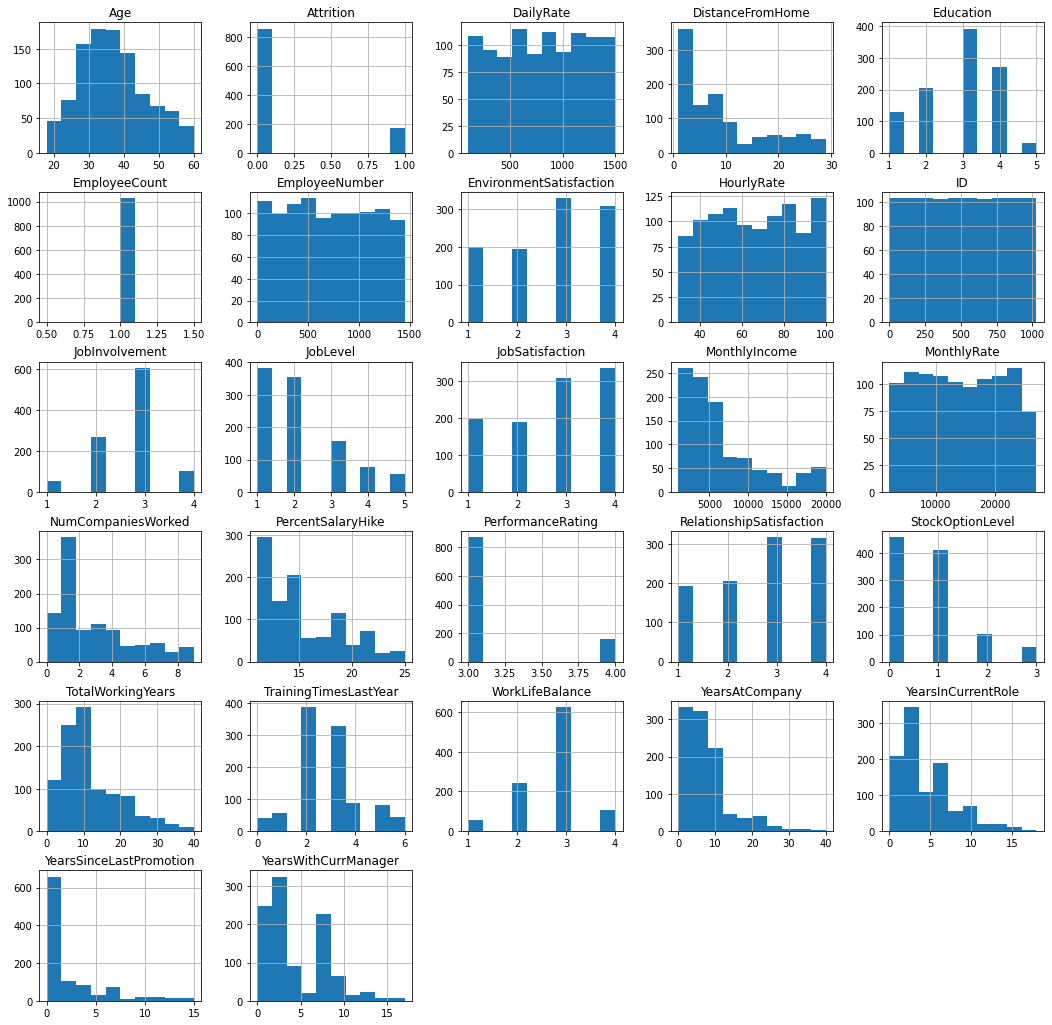

In [5]:
# visualization
attrition_data.hist(figsize=(18,18))
plt.show()

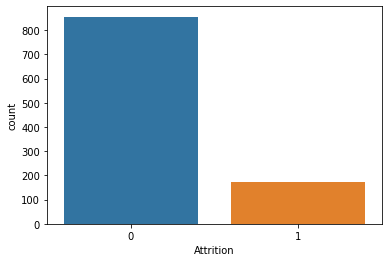

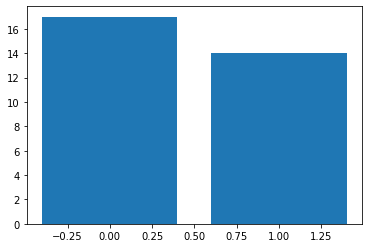

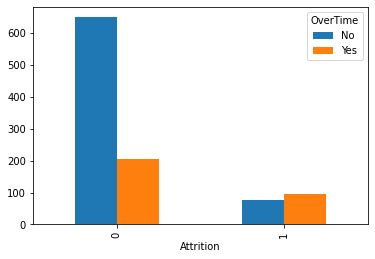

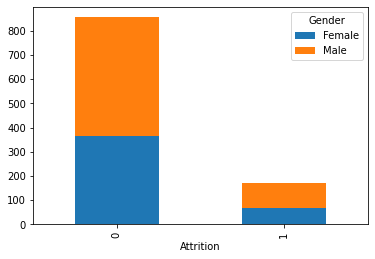

In [6]:
sns.countplot(attrition_data["Attrition"])      # count plot of attrition
plt.show()
plt.bar(attrition_data["Attrition"],attrition_data["YearsWithCurrManager"])
plt.show()
cross=pd.crosstab(attrition_data["Attrition"],attrition_data["OverTime"])        
cross.plot.bar()
plt.show()
cross2=pd.crosstab(attrition_data["Attrition"],attrition_data["Gender"])  
cross2.plot.bar(stacked=True)
# sns.pairplot(attrition_data)
plt.show()

In [0]:
# splitting dataset into X and Y that is i/p data and o/p or prediction we need
X= attrition_data.drop(["ID","Attrition","EmployeeCount","EmployeeNumber"],axis=1)   # removing the columns from the dataset that has very less importance in prediction
y= attrition_data["Attrition"]

In [8]:
# checking for any NA in the dataset
X.isna().sum().sum()

0

In [0]:
# converting categorical data into right format to use in the ML algos
x_gender=pd.get_dummies(X["Gender"],drop_first=True,prefix="embarked")
x_PerformanceRating=pd.get_dummies(X["PerformanceRating"],drop_first=True,prefix="PerformanceRating")  # as there are only 2 values (3,4)
x_EducationField=pd.get_dummies(X["EducationField"],drop_first=True,prefix="EducationField")
x_BusinessTravel=pd.get_dummies(X["BusinessTravel"],drop_first=True,prefix="BusinessTravel")
x_Department=pd.get_dummies(X["Department"],drop_first=True,prefix="Department")
x_JobRole=pd.get_dummies(X["JobRole"],drop_first=True,prefix="JobRole")
x_MaritalStatus=pd.get_dummies(["MaritalStatus"],drop_first=True,prefix="MaritalStatus")
x_OverTime=pd.get_dummies(X["OverTime"],drop_first=True,prefix="OverTime")

X=pd.concat([X,x_gender,x_PerformanceRating,x_EducationField,x_BusinessTravel,x_Department,x_JobRole,x_MaritalStatus,x_MaritalStatus,x_OverTime],axis=1)

X=X.drop(["Gender","PerformanceRating","EducationField","BusinessTravel","Department","JobRole","MaritalStatus","OverTime"],axis=1)

In [0]:
# now bringing all the values in one scale performing normalization
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
age=min_max.fit_transform(X["Age"].values.reshape(-1, 1))
X["Age"]=age

dailyrate=min_max.fit_transform(X["DailyRate"].values.reshape(-1, 1))
X["DailyRate"]=dailyrate

monthlyincome=min_max.fit_transform(X["MonthlyIncome"].values.reshape(-1, 1))
X["MonthlyIncome"]=monthlyincome

monthlyrate=min_max.fit_transform(X["MonthlyRate"].values.reshape(-1, 1))
X["MonthlyRate"]=monthlyrate

hourlyrate=min_max.fit_transform(X["HourlyRate"].values.reshape(-1, 1))
X["HourlyRate"]=hourlyrate

# converting percentage to proper range
X["PercentSalaryHike"]=X["PercentSalaryHike"]/100

In [11]:
X.head() # dataset after all pre processing 

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,embarked_Male,PerformanceRating_4,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,0.547619,0.715820,1,2,2,0.914286,3,2,4,0.262454,0.698053,8,0.11,1,0,8,0,1,6,4,0,5,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
1,0.738095,0.126700,8,1,3,0.442857,2,2,2,0.217009,0.916001,1,0.23,4,1,10,3,3,10,7,1,7,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,0.452381,0.909807,2,2,4,0.885714,2,1,3,0.056925,0.012126,6,0.15,2,0,7,3,3,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1
3,0.357143,0.923407,3,4,4,0.371429,3,1,3,0.100053,0.845814,1,0.11,3,0,8,3,3,8,7,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
4,0.214286,0.350036,2,1,1,0.142857,3,1,2,0.129489,0.583738,9,0.12,4,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0


In [0]:
# now our dataset looks cleaned and now we can apply machine learning algos on it
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [13]:
rfc=RandomForestClassifier(n_estimators=80)
rfc.fit(X_train,Y_train)
pred_test = rfc.predict(X_test)
pred_train = rfc.predict(X_train)
print("Training Data accuracy Score:",accuracy_score(Y_train,pred_train))
print("Training Data accuracy Score:",accuracy_score(Y_test,pred_test))
print("Confusion Matrix:\n",confusion_matrix(Y_test,pred_test))
print("Classification report:\n",classification_report(Y_test,pred_test))

Training Data accuracy Score: 1.0
Training Data accuracy Score: 0.8543689320388349
Confusion Matrix:
 [[171   1]
 [ 29   5]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       172
           1       0.83      0.15      0.25        34

    accuracy                           0.85       206
   macro avg       0.84      0.57      0.58       206
weighted avg       0.85      0.85      0.81       206



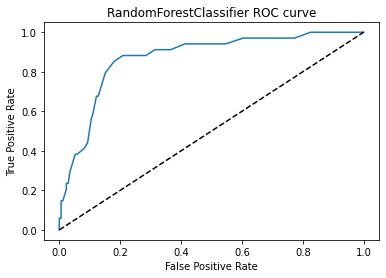

In [14]:
probs = rfc.predict_proba(X_test)   # predict_proba only gives the probability of 0 and 1 
probs = probs[:, 1]   # selecting probability of 1
fper, tper, thresholds = roc_curve(Y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC curve')
plt.show()

In [15]:
xgb_class=XGBClassifier(learning_rate=0.05)
xgb_class.fit(X_train,Y_train)
pred_test = xgb_class.predict(X_test)
pred_train = xgb_class.predict(X_train)
print("Training Data accuracy Score:",accuracy_score(Y_train,pred_train))
print("Training Data accuracy Score:",accuracy_score(Y_test,pred_test))
print("Confusion Matrix:\n",confusion_matrix(Y_test,pred_test))
print("Classification report:\n",classification_report(Y_test,pred_test))

Training Data accuracy Score: 0.9063260340632603
Training Data accuracy Score: 0.8543689320388349
Confusion Matrix:
 [[169   3]
 [ 27   7]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       172
           1       0.70      0.21      0.32        34

    accuracy                           0.85       206
   macro avg       0.78      0.59      0.62       206
weighted avg       0.84      0.85      0.82       206



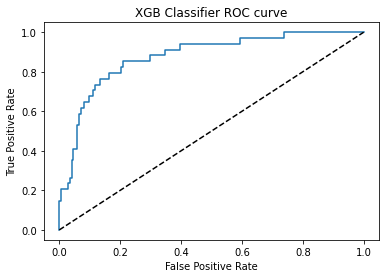

In [16]:
probs = xgb_class.predict_proba(X_test)   # predict_proba only gives the probability of 0 and 1 
probs = probs[:, 1]   # selecting probability of 1
fper, tper, thresholds = roc_curve(Y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier ROC curve')
plt.show()

In [17]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,Y_train)
pred_test = dec_tree.predict(X_test)
pred_train = dec_tree.predict(X_train)
print("Training Data accuracy Score:",accuracy_score(Y_train,pred_train))
print("Training Data accuracy Score:",accuracy_score(Y_test,pred_test))
print("Confusion Matrix:\n",confusion_matrix(Y_test,pred_test))
print("Classification report:\n",classification_report(Y_test,pred_test))

Training Data accuracy Score: 1.0
Training Data accuracy Score: 0.7961165048543689
Confusion Matrix:
 [[146  26]
 [ 16  18]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       172
           1       0.41      0.53      0.46        34

    accuracy                           0.80       206
   macro avg       0.66      0.69      0.67       206
weighted avg       0.82      0.80      0.81       206



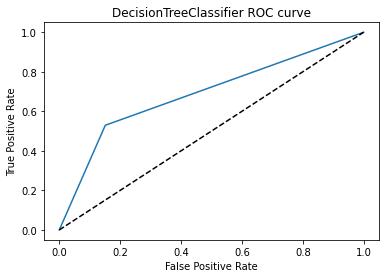

In [18]:
probs = dec_tree.predict_proba(X_test)   # predict_proba only gives the probability of 0 and 1 
probs = probs[:, 1]   # selecting probability of 1
fper, tper, thresholds = roc_curve(Y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier ROC curve')
plt.show()

In [19]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)
pred_test = knn.predict(X_test)
pred_train = knn.predict(X_train)
print("Training Data accuracy Score:",accuracy_score(Y_train,pred_train))
print("Training Data accuracy Score:",accuracy_score(Y_test,pred_test))
print("Confusion Matrix:\n",confusion_matrix(Y_test,pred_test))
print("Classification report:\n",classification_report(Y_test,pred_test))

Training Data accuracy Score: 0.8357664233576643
Training Data accuracy Score: 0.8398058252427184
Confusion Matrix:
 [[172   0]
 [ 33   1]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       172
           1       1.00      0.03      0.06        34

    accuracy                           0.84       206
   macro avg       0.92      0.51      0.48       206
weighted avg       0.87      0.84      0.77       206



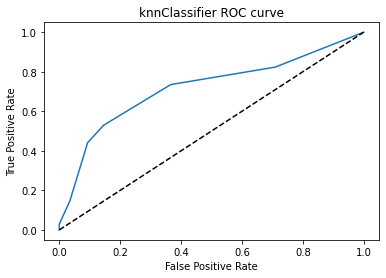

In [20]:
probs = knn.predict_proba(X_test)   # predict_proba only gives the probability of 0 and 1 
probs = probs[:, 1]   # selecting probability of 1
fper, tper, thresholds = roc_curve(Y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('knnClassifier ROC curve')
plt.show()

In [21]:
# xgbboost technique using gridsearch algo on it to find best values of hyperparameter
parameter={
    "max_depth": range(2,10,1),
    "learning_rate":[0.1,0.01,0.5],
    "n_estimators": range(60,440,60)
}
xgb_class_new=XGBClassifier()
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(
    estimator=xgb_class_new,
    param_grid=parameter,
    scoring="roc_auc",
    n_jobs=10,
    cv=10,
    verbose=True
)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   10.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   43.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  4.1min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  7.2min
[Parallel(n_jobs=10)]: Done 1680 out of 1680 | elapsed:  9.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 440, 60)},
    

In [22]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 360}

In [23]:
xgb_class_new1=XGBClassifier(learning_rate=0.1,max_depth=2,n_estimators=360)
xgb_class_new1.fit(X_train,Y_train)
pred_test = xgb_class_new1.predict(X_test)
pred_train = xgb_class_new1.predict(X_train)
print("Training Data accuracy Score:",accuracy_score(Y_train,pred_train))
print("Training Data accuracy Score:",accuracy_score(Y_test,pred_test))
print("Confusion Matrix:\n",confusion_matrix(Y_test,pred_test))
print("Classification report:\n",classification_report(Y_test,pred_test))

Training Data accuracy Score: 0.9635036496350365
Training Data accuracy Score: 0.8786407766990292
Confusion Matrix:
 [[167   5]
 [ 20  14]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       172
           1       0.74      0.41      0.53        34

    accuracy                           0.88       206
   macro avg       0.81      0.69      0.73       206
weighted avg       0.87      0.88      0.86       206



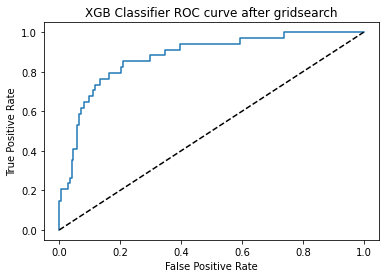

In [24]:
probs = xgb_class.predict_proba(X_test)   # predict_proba only gives the probability of 0 and 1 
probs = probs[:, 1]   # selecting probability of 1
fper, tper, thresholds = roc_curve(Y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier ROC curve after gridsearch')
plt.show()

In [59]:
# k fold 
from sklearn.model_selection import KFold
# initializing kflod with no. of splits 
kf = KFold(n_splits = 5,shuffle=True)
# classifier object created 
rf_class=RandomForestClassifier(n_estimators=80)
scores = []
for i in range(5):     # loop till all 5 splits used as validation data
    result = next(kf.split(X), None)      # contains 2 array 1. for training data 2. for testing validation data 
    x_train = X.iloc[result[0]]         # saving rows of index result in variables 
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]

    rf_class.fit(x_train,y_train)  # fitting 5 times on each fold we have created 
    predictions = rf_class.predict(x_test)  
    scores.append(accuracy_score(y_test,predictions)) #accuracy score of each fold we have created 
# print(result)
print('each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))              # total accuracy of the kfold cross validation technique
y_test.shape


each Iteration:  [0.8300970873786407, 0.8592233009708737, 0.8543689320388349, 0.8543689320388349, 0.8446601941747572]
Average K-Fold Score : 0.8485436893203883


(206,)

(206,)

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  